In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import tensorflow as tf
import pandas as pd
import glob2
import os
from itertools import product
import numpy as np
import pickle
#import seaborn as sns

#%matplotlib notebook
#%matplotlib
%matplotlib inline
from logic_inspect import show_composite
from tboard import file2number
from nonlinearities import sigmoid
from vis_utils import (split_posneg , get_path, get_np_network,
                        get_neuron_values, splitL, load_weights,
                        resample_grid,vec_get_neuron_values,
                        get_del_weights  )
from vis_utils import Pub_Model_Dirs, clist,listLineStyle
from calc_bounds import param_counter
from sklearn.metrics import classification_report
from sympy import preorder_traversal,postorder_traversal
import sympy
#clist=['g','c','m','y','k','b','r']
#listLineStyle=['solid', 'dashed', 'dashdot', 'dotted']
from calc_maps import get_net_states
from sklearn import svm

from maxmargin_compare import get_state_fn,get_gram_fn
from maxmargin_compare import paint_data
from sklearn.linear_model import LogisticRegression, SGDClassifier
from vis_utils import paint_data, paint_binary_contours
figure_folder='./figures/'

## ReDO CX examples

using log_dir: ./logs/Fig_Model_0505_012310_noise3D1A3
noise3D1A3


using log_dir: ./logs/Fig_Model_0505_012310_noise3D1A3
noise3D1A3


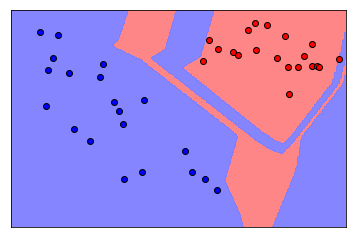

In [7]:
#log_dir='./logs/Fig_Model_0505_003620_noise2D1A3'#Works well
#log_dir='./logs/Fig_Model_0505_005701_noise1D1A3'#works well
log_dir='./logs/Fig_Model_0505_012310_noise3D1A3'#Great!
#log_dir=Pub_Model_Dirs[2][0]
print 'using log_dir:',log_dir
descrip=log_dir.split('_')[-1]
print descrip

record_dir=os.path.join(log_dir,'records')
id_str=str(file2number(log_dir))
all_weights=load_weights(log_dir)
dt=10
weights=[[w[::dt],b[::dt]] for w,b in all_weights]
arch=[b.shape[-1] for w,b in weights[:-1]]#net architecture
del_weights=get_del_weights(all_weights)
gridX=np.load(get_path('gridX','hmwatch',log_dir))
gX=resample_grid(gridX)#200  #standardized grid
time=-1
time_weights=[[w[time],b[time]] for w,b in del_weights]#d*2*wtshape
PLast=vec_get_neuron_values(gX,time_weights)#Layers*(wpad,xpad,time,layersize)
#PLayers=vec_get_neuron_values(gX,del_weights)#Layers*(wpad,xpad,time,layersize)
np_net=np.squeeze(PLast[-1])#timexgX.shape
LastProb=sigmoid(np_net)

scatter_data_dir=os.path.join(Pub_Model_Dirs[2][0],'records')
npX=np.load(os.path.join(scatter_data_dir,'dataX.npy'))
npY=np.load(os.path.join(scatter_data_dir,'dataY.npy'))
Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)
m_samples,xdim=npX.shape
X,Y=npX,npY.ravel()

fig,ax=plt.subplots()
paint_data(ax,npX,npY)
paint_binary_contours( ax,gX, LastProb, thresh=0.5)
plt.savefig(record_dir+'/'+id_str+'_dataclassif_PT-Fig1a.pdf')
plt.savefig('./figures/Fig1/'+id_str+'_dataclassif_'+descrip+'_PT-Fig1a.pdf')
plt.savefig('./figures/Fig1/'+id_str+'_dataclassif_'+descrip+'_PT-Fig1a.png')

using log_dir: ./logs/Fig_Model_0505_003620_noise2D1A3
noise2D1A3


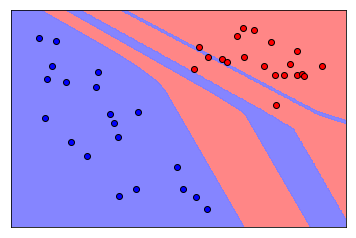

In [8]:
log_dir='./logs/Fig_Model_0505_003620_noise2D1A3'#Works well
#log_dir='./logs/Fig_Model_0505_005701_noise1D1A3'#works well
#log_dir='./logs/Fig_Model_0505_012310_noise3D1A3'#Great!
#log_dir=Pub_Model_Dirs[2][0]
print 'using log_dir:',log_dir
descrip=log_dir.split('_')[-1]
print descrip

record_dir=os.path.join(log_dir,'records')
id_str=str(file2number(log_dir))
all_weights=load_weights(log_dir)
dt=10
weights=[[w[::dt],b[::dt]] for w,b in all_weights]
arch=[b.shape[-1] for w,b in weights[:-1]]#net architecture
del_weights=get_del_weights(all_weights)
gridX=np.load(get_path('gridX','hmwatch',log_dir))
gX=resample_grid(gridX)#200  #standardized grid
time=-1
time_weights=[[w[time],b[time]] for w,b in del_weights]#d*2*wtshape
PLast=vec_get_neuron_values(gX,time_weights)#Layers*(wpad,xpad,time,layersize)
#PLayers=vec_get_neuron_values(gX,del_weights)#Layers*(wpad,xpad,time,layersize)
np_net=np.squeeze(PLast[-1])#timexgX.shape
LastProb=sigmoid(np_net)

scatter_data_dir=os.path.join(Pub_Model_Dirs[2][0],'records')
npX=np.load(os.path.join(scatter_data_dir,'dataX.npy'))
npY=np.load(os.path.join(scatter_data_dir,'dataY.npy'))
Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)
m_samples,xdim=npX.shape
X,Y=npX,npY.ravel()

fig,ax=plt.subplots()
paint_data(ax,npX,npY)
paint_binary_contours( ax,gX, LastProb, thresh=0.5)
plt.savefig(record_dir+'/'+id_str+'_dataclassif_PT-Fig1b.pdf')
plt.savefig('./figures/Fig1/'+id_str+'_dataclassif_'+descrip+'_PT-Fig1b.pdf')
plt.savefig('./figures/Fig1/'+id_str+'_dataclassif_'+descrip+'_PT-Fig1b.png')

using log_dir: ./logs/Fig_Model_0505_005701_noise1D1A3
noise1D1A3


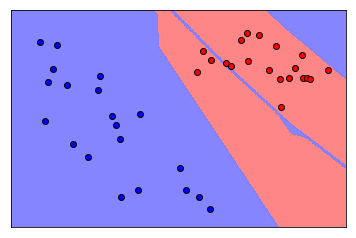

In [9]:
# log_dir='./logs/Fig_Model_0505_003620_noise2D1A3'#Works well
log_dir='./logs/Fig_Model_0505_005701_noise1D1A3'#works well
#log_dir='./logs/Fig_Model_0505_012310_noise3D1A3'#Great!
#log_dir=Pub_Model_Dirs[2][0]
print 'using log_dir:',log_dir
descrip=log_dir.split('_')[-1]
print descrip

record_dir=os.path.join(log_dir,'records')
id_str=str(file2number(log_dir))
all_weights=load_weights(log_dir)
dt=10
weights=[[w[::dt],b[::dt]] for w,b in all_weights]
arch=[b.shape[-1] for w,b in weights[:-1]]#net architecture
del_weights=get_del_weights(all_weights)
gridX=np.load(get_path('gridX','hmwatch',log_dir))
gX=resample_grid(gridX)#200  #standardized grid
time=-1
time_weights=[[w[time],b[time]] for w,b in del_weights]#d*2*wtshape
PLast=vec_get_neuron_values(gX,time_weights)#Layers*(wpad,xpad,time,layersize)
#PLayers=vec_get_neuron_values(gX,del_weights)#Layers*(wpad,xpad,time,layersize)
np_net=np.squeeze(PLast[-1])#timexgX.shape
LastProb=sigmoid(np_net)

scatter_data_dir=os.path.join(Pub_Model_Dirs[2][0],'records')
npX=np.load(os.path.join(scatter_data_dir,'dataX.npy'))
npY=np.load(os.path.join(scatter_data_dir,'dataY.npy'))
Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)
m_samples,xdim=npX.shape
X,Y=npX,npY.ravel()

fig,ax=plt.subplots()
paint_data(ax,sX,sY)
paint_binary_contours( ax,gX, LastProb, thresh=0.5)
plt.savefig(record_dir+'/'+id_str+'_dataclassif_PT-Fig1c.pdf')
plt.savefig('./figures/Fig1/'+id_str+'_dataclassif_'+descrip+'_PT-Fig1c.pdf')
plt.savefig('./figures/Fig1/'+id_str+'_dataclassif_'+descrip+'_PT-Fig1c.png')

In [2]:
###Index by [arch#-1][data#-1]
Arch=3
Data=3
log_dir=Pub_Model_Dirs[Arch-1][Data-1]
descrip,id_str=log_dir.split('_')[-1],str(file2number(log_dir))
print 'using log_dir:',log_dir,' descrip:',descrip, 'id str:',id_str

record_dir=os.path.join(log_dir,'records')
pactensor_dir=os.path.join(log_dir,'pac-tensor')
if not os.path.exists(pactensor_dir):
    os.makedirs(pactensor_dir)

using log_dir: ./logs/Pub_Model_0504_234822_D3A1  descrip: D3A1 id str: 504234822


In [5]:
all_step=np.load(get_path('step','wwatch',log_dir))
all_weights=load_weights(log_dir)#d*2*Txn1xn2
del_weights=get_del_weights(all_weights)
arch=[b.shape[-1] for w,b in del_weights[:-1]]#net architecture
npX=np.load(os.path.join(record_dir,'dataX.npy'))
npY=np.load(os.path.join(record_dir,'dataY.npy'))
Xpos,Xneg,Ypos,Yneg=split_posneg(npX,npY)
m_samples,xdim=npX.shape
gridX=np.load(get_path('gridX','hmwatch',log_dir))

gX=gridX #my poor computer


gX0,gX1=gX[:,:,0],gX[:,:,1]
X,Y=npX,npY.ravel()
fl_gX=gX.reshape([-1,xdim])



# weights=[[w[trn_iter],b[trn_iter]] for w,b in step_dweights]#d*2*wtshape

trn_iter=-1
# trn_iter=100

weights=[[w[trn_iter],b[trn_iter]] for w,b in del_weights]#d*2*wtshape
Wweights,Bweights=zip(*weights)

In [6]:
get_states=get_state_fn(weights)
get_gram=get_gram_fn(Bweights,get_states)

gram=get_gram(X,X)
gram_flgrid=get_gram(fl_gX,X)

In [ ]:
##Sometimes doesnt fit due to class imbalance issues
# fits d3a1
logistic=LogisticRegression(C=1e5,
                            solver='lbfgs', 
                            max_iter=10000,#1k default
                           )  
# logistic=LogisticRegression(
#         C=1e5,  #default 1.0
#         penalty='l1',
# #         solver='lbfgs', 
#         max_iter=10000,#1k default
#                            )  


clf=logistic
clf.fit(gram,Y)
clf.acc=np.round(clf.score(gram,Y),4)
clf.correct=(clf.predict(gram)==Y)
clf.wh_wrong=np.where(~ clf.correct)[0]

if len(clf.wh_wrong)>0:
    print 'Warn not all learned'
    wh_bad=np.where(clf.correct==False)[0]
    

# clf=svm.SVC(kernel='precomputed',
#            #C=1e-2,
#            C=1e-5,
# #             C=0.,#ERR
#            #C=1.,
#            tol=0.0001,
# #            shrinking=False,
#            )
# clf.fit(gram,Y)
# print 'Model Fit'
# correct=clf.predict(gram)==Y
# if not correct.all():
#     print 'Warn not all learned'
#     wh_bad=np.where(correct==False)[0]
# alpha=clf.dual_coef_
# #svm_dec=clf.decision_function(gram)
# #recon=np.sum(gram[:,clf.support_]*alpha,axis=-1)+clf.intercept_
# #Good. dec==recon True

# #clf.predict(n_samples_test x n_samples_train)(when kernel='precomputed')


#svm_pred=np.reshape(clf.predict(gram_flgrid),gX.shape[:xdim])
clf_fn=np.reshape(clf.decision_function(gram_flgrid),gX.shape[:xdim])
net_fn=vec_get_neuron_values(gX,weights)[-1].reshape(gX.shape[:xdim])
clf_pred=np.sign(clf_fn)
net_pred=np.sign(net_fn)

clf_fn/=np.max(np.abs(clf_fn))
net_fn/=np.max(np.abs(net_fn))

net_X=vec_get_neuron_values(X,weights)[-1]
print 'CLF score',clf.score(gram,Y)
print 'NN score', np.mean(np.sign(net_X)==npY)

In [ ]:
np.mean(np.abs(clf.coef_)>0 )

# Something is up with the gram implementation because training embedding doenst seem linearly separable

In [8]:
def plot(gX,weights,net_fn,svm_fn):
    # fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,6))
    fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,6))


    cmap = plt.cm.get_cmap("Purples")
    #my_cmap = cmap(np.arange(cmap.N))
    #my_cmap[:,-1] = np.linspace(0, 1, cmap.N)
    lvls=np.arange(-1,1.,0.2)

    plt.tight_layout()
    plt.xticks([]) # labels 
    plt.yticks([])

    paint_data(ax1,X,Y)
    paint_data(ax2,X,Y)
    # for ax in [ax1,ax2]:
    #     ax.xaxis.set_ticks_position('none') # tick markers
    #     ax.yaxis.set_ticks_position('none')
    #     ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=600,c='b',linewidth='3')
    #     ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=600,c='r',linewidth='3')

    # ctf1=ax1.contourf(gX0,gX1,net_fn,levels=[-1.01,0,1.01],colors=['w',cmap(190)],alpha=0.5)
    # ctf2=ax2.contourf(gX0,gX1,svm_pred,levels=[-1.01,0,1.01],colors=['w',cmap(190)],alpha=0.5)
    ctf1=ax1.contourf(gX0,gX1,net_fn,
    #                   levels=[-1.01,0,1.01],
                      levels=lvls,
    #                   colors=['w',cmap(190)],
                      cmap=plt.get_cmap('PuOr'),
                      alpha=0.5,
    #                   anti_aliasing=True,
                     )
    ctf2=ax2.contourf(gX0,gX1,svm_fn,
    #                   levels=[-1.01,0,1.01],
                      levels=lvls,
    #                   colors=['w',cmap(190)],
                      cmap=plt.get_cmap('PuOr'),
                      alpha=0.5,
    #                   anti_aliasing=True,
                     )
    ax3.contour(gX0,gX1,svm_fn,
    #                   levels=[-1.01,0,1.01],
                      levels=lvls,
                        colors='r',
#                 linestyles='solid',
#                 linestyles='dotted',
    #                   colors=['w',cmap(190)],
    #                   cmap=plt.get_cmap('PuOr'),
    #                   alpha=0.5,
    #                   anti_aliasing=True,
                     )
    PLayers=vec_get_neuron_values(gX,weights)[:-1]
    for l_Act in PLayers:
        listL=splitL(l_Act)
        for Pneu in listL:
            ax3.contour(gX0,gX1,Pneu,levels=[0.],colors='k',linestyles='solid')



    fig.subplots_adjust(right=0.8)
    cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    fig.colorbar(ctf2, cax=cbar_ax)

    # im1=ax1.imshow(net_fn[::-1],vmin=-1,vmax=+1)
    # im2=ax2.imshow(svm_fn[::-1],vmin=-1,vmax=+1)
    # fig.subplots_adjust(right=0.8)
    # cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
    # fig.colorbar(im1, cax=cbar_ax)


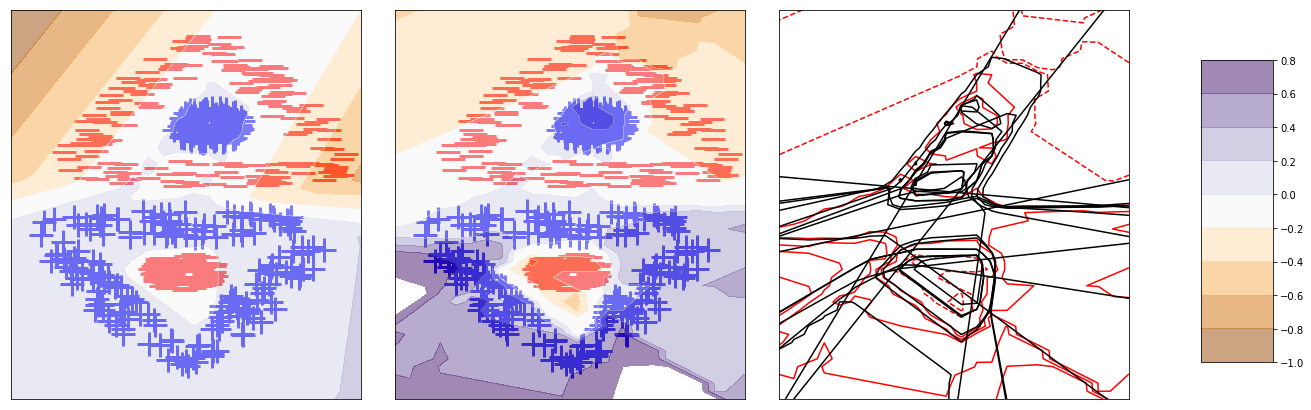

In [9]:
plot(gX,weights,net_fn,clf_fn)

In [138]:
from sklearn.svm import LinearSVC
lin=LinearSVC(C=1e-3,tol=1e-5,dual=True,loss='hinge')
lin.fit(gram,Y)
lin.score(gram,Y)

0.975

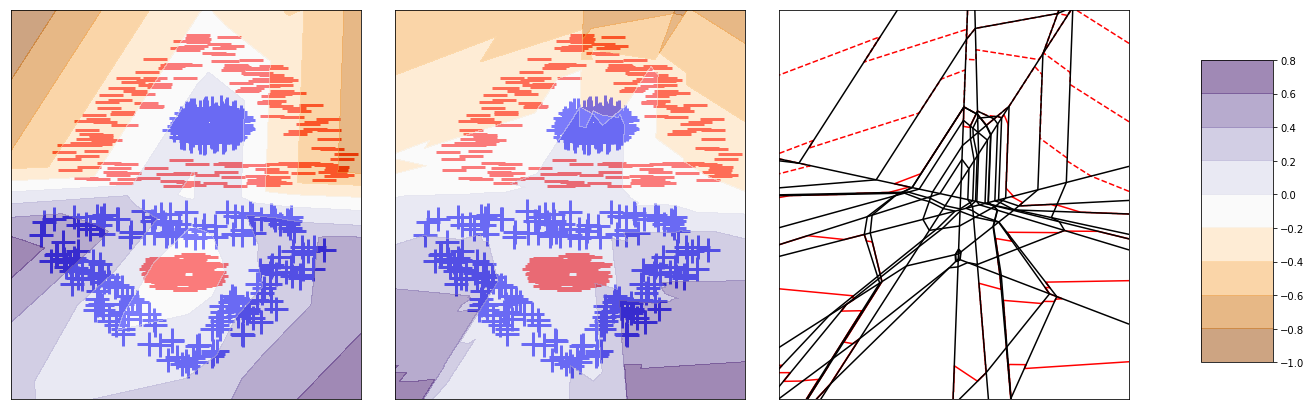

In [76]:
# fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,6))
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(20,6))


cmap = plt.cm.get_cmap("Purples")
#my_cmap = cmap(np.arange(cmap.N))
#my_cmap[:,-1] = np.linspace(0, 1, cmap.N)
lvls=np.arange(-1,1.,0.2)

plt.tight_layout()
plt.xticks([]) # labels 
plt.yticks([])

paint_data(ax1,X,Y)
paint_data(ax2,X,Y)
# for ax in [ax1,ax2]:
#     ax.xaxis.set_ticks_position('none') # tick markers
#     ax.yaxis.set_ticks_position('none')
#     ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=600,c='b',linewidth='3')
#     ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=600,c='r',linewidth='3')

# ctf1=ax1.contourf(gX0,gX1,net_fn,levels=[-1.01,0,1.01],colors=['w',cmap(190)],alpha=0.5)
# ctf2=ax2.contourf(gX0,gX1,svm_pred,levels=[-1.01,0,1.01],colors=['w',cmap(190)],alpha=0.5)
ctf1=ax1.contourf(gX0,gX1,net_fn,
#                   levels=[-1.01,0,1.01],
                  levels=lvls,
#                   colors=['w',cmap(190)],
                  cmap=plt.get_cmap('PuOr'),
                  alpha=0.5,
#                   anti_aliasing=True,
                 )
ctf2=ax2.contourf(gX0,gX1,svm_fn,
#                   levels=[-1.01,0,1.01],
                  levels=lvls,
#                   colors=['w',cmap(190)],
                  cmap=plt.get_cmap('PuOr'),
                  alpha=0.5,
#                   anti_aliasing=True,
                 )
ax3.contour(gX0,gX1,svm_fn,
#                   levels=[-1.01,0,1.01],
                  levels=lvls,
                    colors='r',
            linestyle='solid',
#                   colors=['w',cmap(190)],
#                   cmap=plt.get_cmap('PuOr'),
#                   alpha=0.5,
#                   anti_aliasing=True,
                 )
PLayers=vec_get_neuron_values(gX,weights)[:-1]
for l_Act in PLayers:
    listL=splitL(l_Act)
    for Pneu in listL:
        ax3.contour(gX0,gX1,Pneu,levels=[0.],colors='k',linestyle='solid')
        
        
        
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(ctf2, cax=cbar_ax)

# im1=ax1.imshow(net_fn[::-1],vmin=-1,vmax=+1)
# im2=ax2.imshow(svm_fn[::-1],vmin=-1,vmax=+1)
# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(im1, cax=cbar_ax)


## t=500

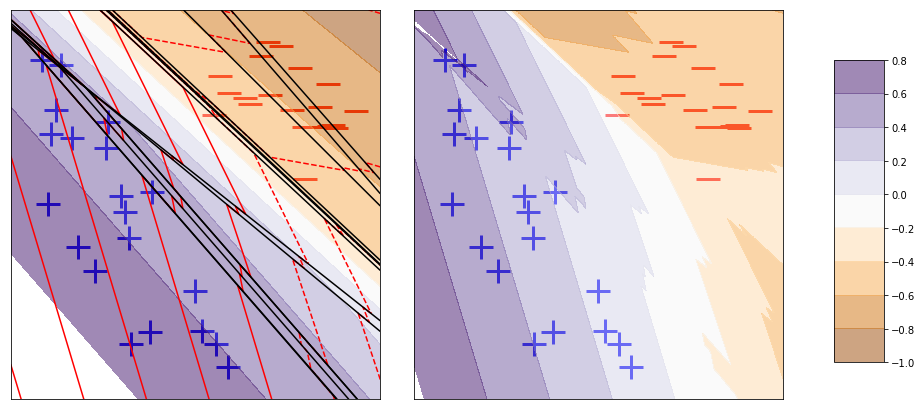

In [69]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,6))

cmap = plt.cm.get_cmap("Purples")
#my_cmap = cmap(np.arange(cmap.N))
#my_cmap[:,-1] = np.linspace(0, 1, cmap.N)
lvls=np.arange(-1,1.,0.2)

plt.tight_layout()
plt.xticks([]) # labels 
plt.yticks([])

paint_data(ax1,X,Y)
paint_data(ax2,X,Y)
# for ax in [ax1,ax2]:
#     ax.xaxis.set_ticks_position('none') # tick markers
#     ax.yaxis.set_ticks_position('none')
#     ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=600,c='b',linewidth='3')
#     ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=600,c='r',linewidth='3')

# ctf1=ax1.contourf(gX0,gX1,net_fn,levels=[-1.01,0,1.01],colors=['w',cmap(190)],alpha=0.5)
# ctf2=ax2.contourf(gX0,gX1,svm_pred,levels=[-1.01,0,1.01],colors=['w',cmap(190)],alpha=0.5)
ctf1=ax1.contourf(gX0,gX1,net_fn,
#                   levels=[-1.01,0,1.01],
                  levels=lvls,
#                   colors=['w',cmap(190)],
                  cmap=plt.get_cmap('PuOr'),
                  alpha=0.5,
#                   anti_aliasing=True,
                 )
ctf2=ax2.contourf(gX0,gX1,svm_fn,
#                   levels=[-1.01,0,1.01],
                  levels=lvls,
#                   colors=['w',cmap(190)],
                  cmap=plt.get_cmap('PuOr'),
                  alpha=0.5,
#                   anti_aliasing=True,
                 )
ax1.contour(gX0,gX1,svm_fn,
#                   levels=[-1.01,0,1.01],
                  levels=lvls,
                    colors='r',
#                   colors=['w',cmap(190)],
#                   cmap=plt.get_cmap('PuOr'),
#                   alpha=0.5,
#                   anti_aliasing=True,
                 )
PLayers=vec_get_neuron_values(gX,weights)[:-1]
for l_Act in PLayers:
    listL=splitL(l_Act)
    for Pneu in listL:
        ax1.contour(gX0,gX1,Pneu,levels=[0.],colors='k')
        
        
        
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(ctf2, cax=cbar_ax)

# im1=ax1.imshow(net_fn[::-1],vmin=-1,vmax=+1)
# im2=ax2.imshow(svm_fn[::-1],vmin=-1,vmax=+1)
# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(im1, cax=cbar_ax)


## last time point

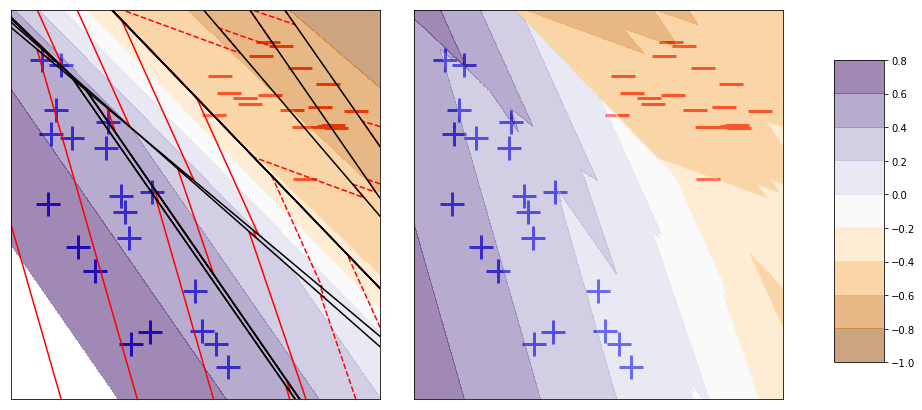

In [49]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,6))

cmap = plt.cm.get_cmap("Purples")
#my_cmap = cmap(np.arange(cmap.N))
#my_cmap[:,-1] = np.linspace(0, 1, cmap.N)
lvls=np.arange(-1,1.,0.2)

plt.tight_layout()
plt.xticks([]) # labels 
plt.yticks([])

paint_data(ax1,X,Y)
paint_data(ax2,X,Y)
# for ax in [ax1,ax2]:
#     ax.xaxis.set_ticks_position('none') # tick markers
#     ax.yaxis.set_ticks_position('none')
#     ax.scatter(Xpos[:,0],Xpos[:,1],marker='+',s=600,c='b',linewidth='3')
#     ax.scatter(Xneg[:,0],Xneg[:,1],marker='_',s=600,c='r',linewidth='3')

# ctf1=ax1.contourf(gX0,gX1,net_fn,levels=[-1.01,0,1.01],colors=['w',cmap(190)],alpha=0.5)
# ctf2=ax2.contourf(gX0,gX1,svm_pred,levels=[-1.01,0,1.01],colors=['w',cmap(190)],alpha=0.5)
ctf1=ax1.contourf(gX0,gX1,net_fn,
#                   levels=[-1.01,0,1.01],
                  levels=lvls,
#                   colors=['w',cmap(190)],
                  cmap=plt.get_cmap('PuOr'),
                  alpha=0.5,
#                   anti_aliasing=True,
                 )
ctf2=ax2.contourf(gX0,gX1,svm_fn,
#                   levels=[-1.01,0,1.01],
                  levels=lvls,
#                   colors=['w',cmap(190)],
                  cmap=plt.get_cmap('PuOr'),
                  alpha=0.5,
#                   anti_aliasing=True,
                 )
ax1.contour(gX0,gX1,svm_fn,
#                   levels=[-1.01,0,1.01],
                  levels=lvls,
                    colors='r',
#                   colors=['w',cmap(190)],
#                   cmap=plt.get_cmap('PuOr'),
#                   alpha=0.5,
#                   anti_aliasing=True,
                 )
PLayers=vec_get_neuron_values(gX,weights)[:-1]
for l_Act in PLayers:
    listL=splitL(l_Act)
    for Pneu in listL:
        ax1.contour(gX0,gX1,Pneu,levels=[0.],colors='k')
        
        
        
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
fig.colorbar(ctf2, cax=cbar_ax)

# im1=ax1.imshow(net_fn[::-1],vmin=-1,vmax=+1)
# im2=ax2.imshow(svm_fn[::-1],vmin=-1,vmax=+1)
# fig.subplots_adjust(right=0.8)
# cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
# fig.colorbar(im1, cax=cbar_ax)


In [36]:
ctf2.levels

array([-0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ])

In [18]:
Y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1])

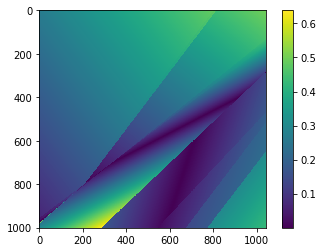

In [12]:
diff=np.abs(svm_fn-net_fn)
plt.imshow(diff)
plt.colorbar()

In [9]:
rel_diff.min()

-36162.80804376206